#  Trabajo Practico 2

    integrantes: Alvarez Vico Jazmín 
                 Cortés Conde Titó Javier
                 Alvarez Vico Jazmín
                 

In [1]:
import scipy as sp
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.signal import welch
import scipy.io


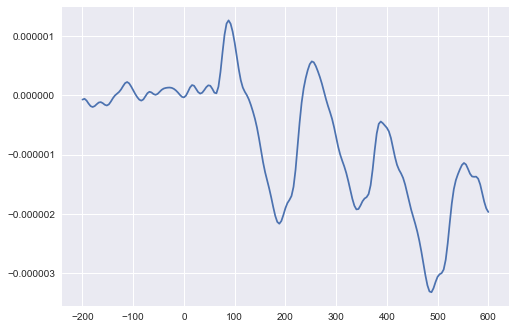

In [2]:
m = sp.io.loadmat('S01.mat')
mm = m['data']

#los datos vienen en la forma: epoch X Electrodo X serie temporal

#epoch X serie temporal
elect8 = mm[:,7,:]
elect44 = mm[:,43,:]
elect80 = mm[:,79,:]
elect131 = mm[:,130,:]
elect185 = mm[:,184,:]

df8 = pd.DataFrame(elect8)
df44 = pd.DataFrame(elect44)
df80 = pd.DataFrame(elect80)
df131 = pd.DataFrame(elect131)
df185 = pd.DataFrame(elect185)

#promedio de serie temporal x epoch. (matriz de 1 epoch con la serie promediada.)
df8_Media = df8.mean(axis=0)
df44_Media = df44.mean(axis=0)
df80_Media = df80.mean(axis=0)
df131_Media = df131.mean(axis=0)
df185_Media = df185.mean(axis=0)

plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.show()

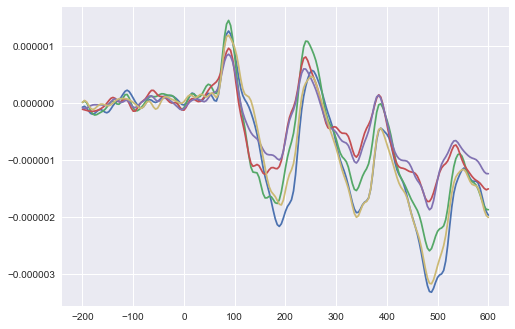

In [3]:
plt.plot(np.linspace(-200, 600, 201), df8_Media)
plt.plot(np.linspace(-200, 600, 201), df44_Media)
plt.plot(np.linspace(-200, 600, 201), df80_Media)
plt.plot(np.linspace(-200, 600, 201), df131_Media)
plt.plot(np.linspace(-200, 600, 201), df185_Media)
plt.show()

In [4]:
#heatmap de elect80 fourier
# welch8 = sp.signal.welch(elect8, noverlap=100, fs=250)
# welch44 = sp.signal.welch(elect44, noverlap=100, fs=250)
# welch131 = sp.signal.welch(elect131, noverlap=100, fs=250)
# welch185 = sp.signal.welch(elect185, noverlap=100, fs=250)
# #welch[0] Me da el rango de frecuencias de elect
# print(welch80[0].shape)
# #welc[1] Me da una matriz de epoch X las frecuencias
# print(welch80[1].shape)
# #como queremos que el eje x sea los epochs transponemos welch[1]
# sn.heatmap(np.transpose(welch80[1]))
# plt.show()

#falta arreglar colores y etiquetas y hacer el promedio de todos los heatmaps(5 electrodos).

/Users/fer/anaconda/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


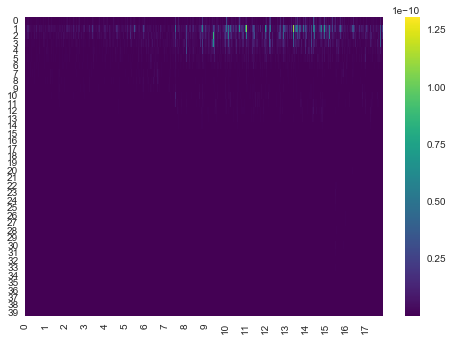

(101,)
(894, 101)


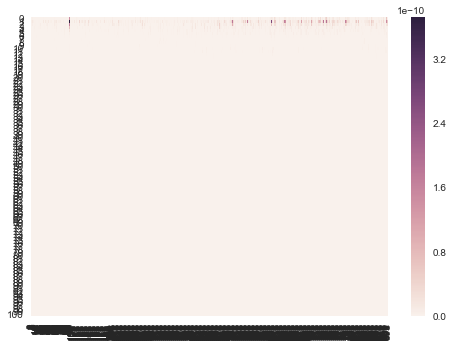

In [5]:
welch8 = sp.signal.welch(elect8, noverlap=100, fs=250)
index8 = (np.abs(welch8[0]-50)).argmin()
potencias8 = welch8[1][:, :index8]

welch44 = sp.signal.welch(elect44, noverlap=100, fs=250)
index44 = (np.abs(welch44[0]-50)).argmin()
potencias44 = welch44[1][:, :index44]

welch80 = sp.signal.welch(elect80, noverlap=100, fs=250)
index80 = (np.abs(welch80[0]-50)).argmin()
potencias80 = welch80[1][:, :index80]

welch131 = sp.signal.welch(elect131, noverlap=100, fs=250)
index131 = (np.abs(welch131[0]-50)).argmin()
potencias131 = welch131[1][:, :index131]

welch185 = sp.signal.welch(elect185, noverlap=100, fs=250)
index185 = (np.abs(welch185[0]-50)).argmin()
potencias185 = welch185[1][:, :index185]

welch8 = sp.signal.welch(elect8, noverlap=100, fs=250)
#welch[0] Me da el rango de frecuencias de elect
print(welch8[0].shape)
#welc[1] Me da una matriz de epoch X las frecuencias
print(welch8[1].shape)
#como queremos que el eje x sea los epochs transponemos welch[1]
sn.heatmap(np.transpose(welch8[1]))
plt.show()

#falta arreglar colores y etiquetas y hacer el promedio de todos los heatmaps(5 electrodos).

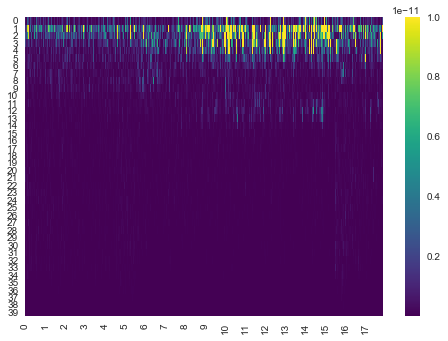

In [42]:
index = (np.abs(welch80[0]-50)).argmin()
frecuencias = welch80[0][:index]
potencias = welch80[1][:, :index]
sn.heatmap(np.transpose(potencias), cmap='viridis', vmax=1e-11)
listbla = [50 * x for x in range(0,18)]
plt.xticks(listbla)
plt.show()


/home/javier/anaconda3/lib/python3.6/site-packages/scipy/signal/spectral.py:1637: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  .format(nperseg, input_length))


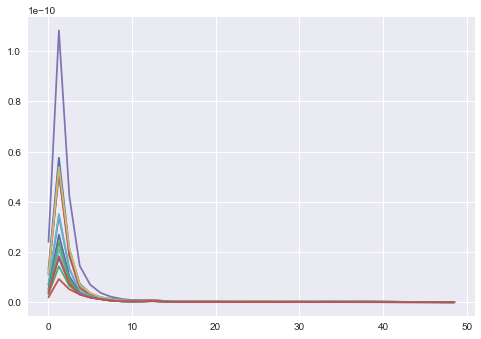

In [6]:
#promedio de potencias de frecuencias por epoch
potencias_media = []
for count in range(15):
    welch = sp.signal.welch(mm[:,count,:], noverlap=100, fs=250)
    frecuencias = welch[0][:index]
    potencias = welch[1][:, :index]
    promedio = potencias.mean(axis=0)
    potencias_media.append(promedio)
    plt.plot(frecuencias, np.transpose(promedio))
plt.show()




#hacer este grafico para los otros electrodos y plotear en el mismo grafico + belleza

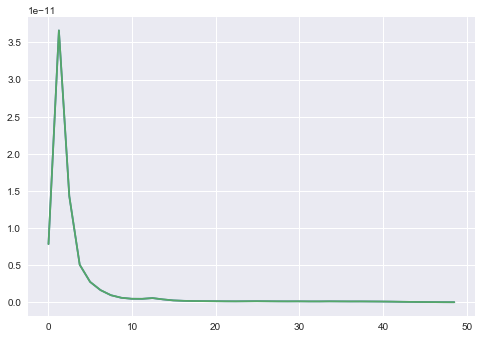

In [29]:
#print(potencias_media[1,:])

potencias_media = np.array(potencias_media)
medias = potencias_media.mean(axis=0)

plt.plot(frecuencias, medias)
plt.show()   
        
        
    

In [41]:
index_delta = (np.abs(frecuencias-4)).argmin()
delta = medias[:index_delta]
print(frecuencias[index_delta])
index_theta = (np.abs(frecuencias-8)).argmin()
theta= medias[index_delta+1:index_theta]
print(frecuencias[index_theta])
index_alpha = (np.abs(frecuencias-13)).argmin()
alpha = medias[index_theta+1:index_alpha]
print(frecuencias[index_alpha])

index_beta = (np.abs(frecuencias-30)).argmin()
beta = medias[index_alpha+1:index_beta]
print(frecuencias[index_beta])

gama = medias[index_beta+1:]
beta = beta.sum()
gama = gama.sum()

3.73134328358
7.46268656716
12.4378109453
29.8507462687
